# To-mel
Script to convert an input (GTZAN dataset) to mel spectrogram for training data.
Mel spectograms logarithmically render frequency above a given threshold.

In [ ]:
# Libraries
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# List of all audio files in GTZAN dataset
gtzan = {}
for (dirpath, dirnames, filenames) in os.walk("../dev/"):
    for filename in filenames:
        if filename.endswith('.au'):
            path = os.path.join(dirpath, filename)
            gtzan[filename] = path

# Loop through items, create spectrograms
for filename, path in gtzan.items():
    # Load audio file as python audio object
    y, sr = librosa.load(path)

    # Define spectrogram dimensions
    fig, ax = plt.subplots()
    height = 128 # Height of image

    # Generate a mel spectrogram array
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=height, fmax=8000)

    # Generate spectrogram
    S_dB = librosa.power_to_db(S, ref=np.max)
    plt.axis('off')
    img = librosa.display.specshow(S_dB, sr=sr, fmax=8000, ax=ax)

    # Generate filename
    name = filename

    # Generate savepath
    genre, track, filetype = name.split(".")
    savepath = "../dev/spec/" + genre + "/" + genre + "." + track + ".png"

    if not os.path.exists(os.path.join("../dev/spec/" + genre)):
        os.mkdir("../dev/spec/" + genre)

    # Write spectrogram to file
    plt.savefig(savepath)
    plt.close(fig)
    plt.clf()


# Generate mel spectrogram from user-provided music file

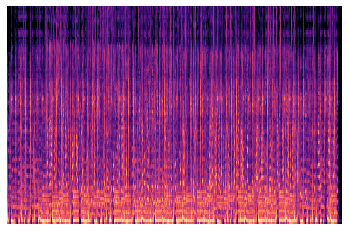

In [15]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load audio
filename = "../dev/test/hiphop.ogg"
y, sr = librosa.load(filename)

# Get audio duration
duration = librosa.get_duration(y=y, sr=sr)

# Extract 30-second snippet from center of audio
center = duration / 2
start = center - 15
end = center + 15
y_snippet = y[int(start * sr):int(end * sr)]

# Generate mel spectrogram
fig, ax = plt.subplots()
plt.axis('off') # Turns off plot axes
height = 128 # Height of image
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=height, fmax=8000)
S_dB = librosa.power_to_db(S, ref=np.max)
img = librosa.display.specshow(S_dB, sr=sr, fmax=8000, ax=ax)

# Write spectrogram to file
plt.savefig('../dev/test/hiphop.png')